In [1]:
import pandas as pd

In [23]:
df1  = pd.read_csv('./data/kaggle-sentences/cv-unique-has-end-punct-sentences.csv')
df2  = pd.read_csv('./data/kaggle-sentences/cv-unique-no-end-punct-sentences.csv')
df3  = pd.read_csv('./data/kaggle-sentences/simple-wiki-unique-has-end-punct-sentences.csv')
df4  = pd.read_csv('./data/kaggle-sentences/simple-wiki-unique-no-end-punct-sentences.csv')

In [24]:
df1.sample(2)

,Unnamed: 0,sentence
22405,22405,The future of AI must be guided by Ethics and ...
19641,19641,The current Lieutenant Governor of Georgia is ...


In [25]:
df2.sample(2)

,Unnamed: 0,sentence
31277,31277,What do you mean by “If you really are a Queen”
42460,42460,Senator John J Williams


In [26]:
df3.sample(2)

,Unnamed: 0,sentence
33794,33794,The male nightingale is known for his singing ...
49504,49504,Jake Shields LRB born January 9 1979 in Mount...


In [27]:
df4.sample(2)

,Unnamed: 0,sentence
61695,61695,They grow in the Northern Hemisphere in easter...
16050,16050,In 1968 and 1969 Ayers became wellknown as a ...


In [28]:
sentences = pd.concat([df1["sentence"], df2["sentence"], df3["sentence"], df4["sentence"]], ignore_index=True)

In [10]:
sentences.sample(4)

177408         The eastern heavens were equally spectacular
6928      The little chick flapped its wings and cried o...
172614    Whats in a name A rose by any other name would...
94429                            Watson accepts him anyway.
Name: sentence, dtype: object

In [34]:
import pandas as pd

def sentence_gen(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            yield line.rstrip("\n")

df5 = pd.Series(sentence_gen("./data/sentences.txt"))
df6 = pd.Series(sentence_gen("./data/test.txt"))
df7 = pd.Series(sentence_gen("./data/train.txt"))

In [35]:
df5.head()

0    A purple pig and a green donkey flew a kite in...
1    Last Friday I saw a spotted striped blue worm ...
2    Sometimes it is better to just walk away from ...
3    Writing a list of random sentences is harder t...
4    Lets all be unique together until we realise w...
dtype: object

In [38]:
df6.head()

0    Why have Jews been the object of the most endu...
1    This release of energetic molecules cools the ...
2    Portuguese had been in control of the gold tra...
3    This raw data has allowed them to develop the ...
4    PROTOZOAN PARASITES AFFECTING FOOD ANIMALS, FO...
dtype: object

In [37]:
df7.head()

0    Soon we dropped into a living forest, where co...
1    Annual population growth rate (2011 est., CIA ...
2    This has led to the recent banning of Neonics ...
3    In addition, these colors weren't confined to ...
4    A family member or a support person may stay w...
dtype: object

In [39]:
sentences = pd.concat([sentences, df5, df6,df7], ignore_index=True)

In [40]:
sentences.sample(2)

2074225    Most of the lakes in Minnesota became ice-free...
1498330    The card is estimated to save people an averag...
dtype: object

In [41]:
sentences.shape

(2240969,)

In [42]:
import pandas as pd
import re
from langdetect import detect, DetectorFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/karthikssalian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
DetectorFactory.seed = 0
stop_words = set(stopwords.words('english'))

In [45]:
datetime_regex = r'\b(\d{4}|\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{1,2}:\d{2}(?:\s*(?:AM|PM))?)\b'

In [46]:
df = sentences[~sentences.str.contains(datetime_regex, case=False, na=False, regex=True)].reset_index(drop=True)

/tmp/ipykernel_24040/2380218947.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = sentences[~sentences.str.contains(datetime_regex, case=False, na=False, regex=True)].reset_index(drop=True)


In [47]:
print(sentences.shape, df.shape)

(2240969,) (2020481,)


In [ ]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

dfeng = df[df.apply(is_english)].reset_index(drop=True)

In [21]:
# [^a-zA-Z0-9\s.,?!] 
non_standard_char_regex = r'[áéíóúÁÉÍÓÚñÑüÜçÇèéàÀèìò\xa9\xa0\xe9]'

df = df[df.str.contains(non_standard_char_regex, case=False, na=False, regex=True)].reset_index(drop=True)

In [22]:
df.shape


(1409,)

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz

--2025-11-16 09:39:30--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.239.111.94, 18.239.111.129, 18.239.111.120, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.239.111.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938013 (916K) [binary/octet-stream]
Saving to: ‘lid.176.ftz’

lid.176.ftz         100%[===================>] 916.03K  --.-KB/s    in 0.09s   

2025-11-16 09:39:30 (9.55 MB/s) - ‘lid.176.ftz’ saved [938013/938013]



In [ ]:
import fasttext

model = fasttext.load_model("lid.176.ftz")


In [73]:
texts = df.astype(str).tolist()

labels, probs = model.predict(texts)

mask = [(lab[0] == '__label__en' and pr[0] > 0.7)
        for lab, pr in zip(labels, probs)]

df_eng = df.loc[mask].reset_index(drop=True)


In [95]:
word_counts = df_eng.str.split().apply(len)

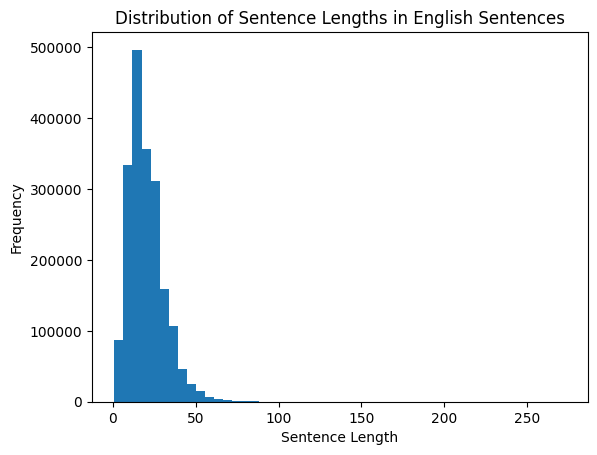

In [96]:
import matplotlib.pyplot as plt

plt.hist(word_counts, bins=50)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths in English Sentences')
plt.show()

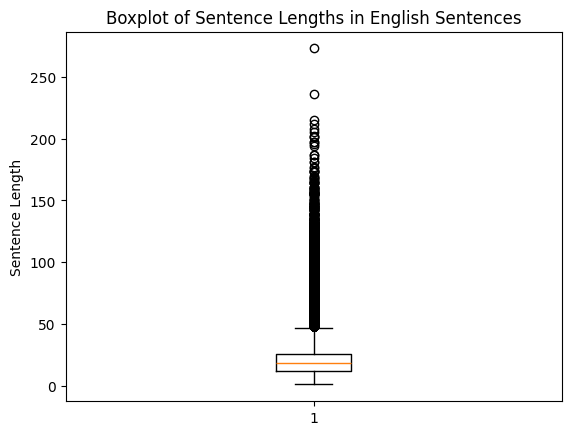

In [97]:
plt.boxplot(word_counts)
plt.title('Boxplot of Sentence Lengths in English Sentences')
plt.ylabel('Sentence Length')
plt.show()

In [111]:
sum(word_counts>60)

10292

In [112]:
df_droped = df_eng[word_counts <= 60].reset_index(drop=True)

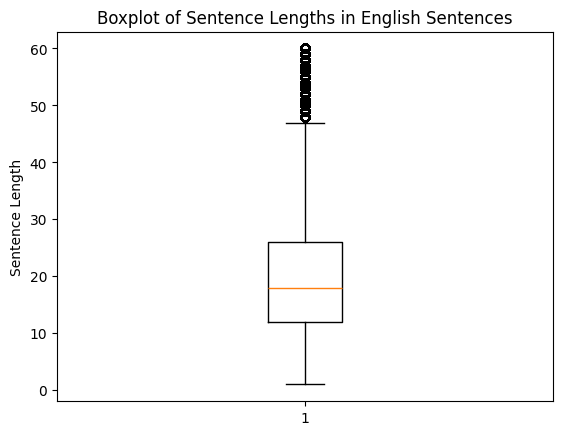

In [121]:
plt.boxplot(df_droped.str.split().apply(len))
plt.title('Boxplot of Sentence Lengths in English Sentences')
plt.ylabel('Sentence Length')
plt.show()

In [113]:
df_droped.shape

(1943069,)

In [114]:
df_lowerse = df_droped.str.lower()

In [115]:
with open("./data/cleaned_sentences.txt", "w", encoding="utf-8") as f:
    for line in df_lowerse:
        f.write(line + "\n")

In [ ]:
import json
import re
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords", quiet=True)
STOP = set(stopwords.words("english"))


pronouns_to_keep = {
    'i', 'me', 'my', 'myself', 
    'you', 'your', 'yours', 'yourself', 
    'he', 'him', 'his', 'himself', 
    'she', 'her', 'hers', 'herself', 
    'it', 'its', 'itself', 
    'we', 'us', 'our', 'ourselves', 
    'they', 'them', 'their', 'theirs', 'themselves'
}

filtered_stop_words = STOP - pronouns_to_keep

with open("./data/sample.jsonl", "w", encoding="utf-8") as f:
    for line in df_lowerse:

        line = line.strip()
        tokens = re.findall(r"[A-Za-z']+|[!?]", line)
        keywords = []
        for word in tokens:
            if word not in filtered_stop_words:
                keywords.append(word)
        if not keywords:
            continue

        kw = " ".join(keywords)

        text = f"User: {kw}\n\nAssistant: {line}"
        f.write(json.dumps({"text": text}, ensure_ascii=False) + "\n")